In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import numpy as np
import pandas as pd
import random
from random import randrange

In [ ]:
#define some parametes related to specific training problem
batch_size = 64
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 32, 32

In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("CIFAR10 dataset has been imported")

CIFAR10 dataset has been imported


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=1)
print("Validation Set has been created")

Validation Set has been created


In [ ]:
classes = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

In [ ]:
print("We have: ", x_train.shape[0], " TRAINING paradigms of size: ", x_train.shape, "\n")
print("We have: ", x_val.shape[0], " VALIDATION paradigms of size: ", x_val.shape, "\n")
print("We have: ", x_test.shape[0], " TESTING paradigms of size: ", x_test.shape, "\n")

We have:  42500  TRAINING paradigms of size:  (42500, 32, 32, 3) 

We have:  7500  VALIDATION paradigms of size:  (7500, 32, 32, 3) 

We have:  10000  TESTING paradigms of size:  (10000, 32, 32, 3) 



In [ ]:
print("Training Set: Νumber of elements for each class")
unique_train, counts_train = np.unique(y_train, return_counts=True)
print(dict(zip(unique_train, counts_train)), "\n")

print("Validation Set: Νumber of elements for each class")
unique_val, counts_val = np.unique(y_val, return_counts=True)
print(dict(zip(unique_val, counts_val)), "\n")

print("Testing Set: Νumber of elements for each class")
unique_test, counts_test = np.unique(y_test, return_counts=True)
print(dict(zip(unique_test, counts_test)), "\n")

Training Set: Νumber of elements for each class
{0: 4239, 1: 4272, 2: 4236, 3: 4269, 4: 4229, 5: 4248, 6: 4255, 7: 4266, 8: 4261, 9: 4225} 

Validation Set: Νumber of elements for each class
{0: 761, 1: 728, 2: 764, 3: 731, 4: 771, 5: 752, 6: 745, 7: 734, 8: 739, 9: 775} 

Testing Set: Νumber of elements for each class
{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000} 



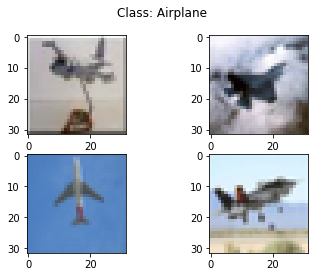

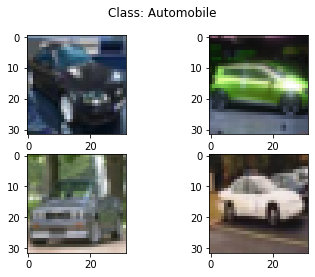

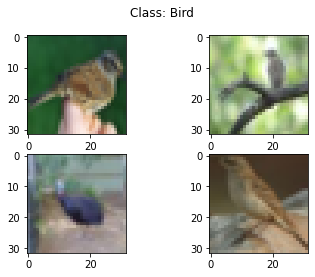

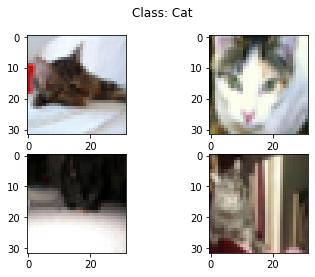

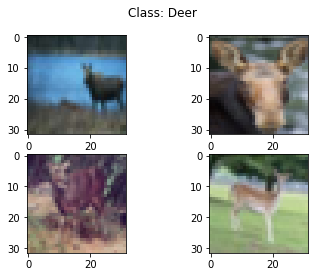

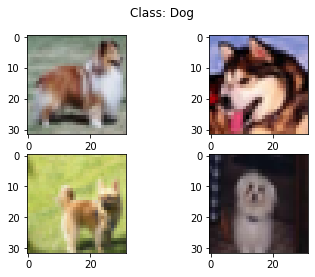

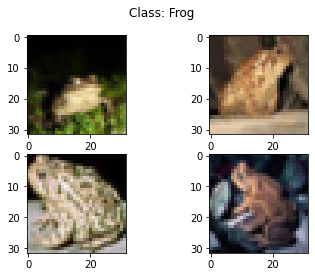

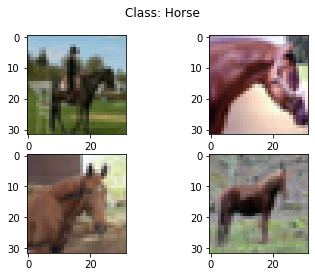

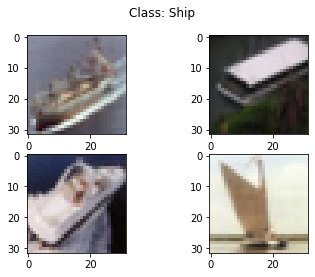

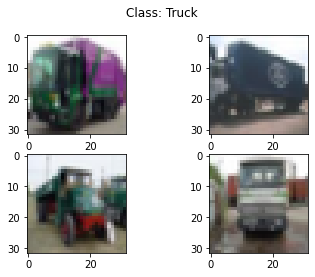

In [ ]:
class_to_demonstrate = 0
while (sum(y_train == class_to_demonstrate) > 4):
    tmp_idxs_to_use = np.where(y_train == class_to_demonstrate)

    # create new plot window
    plt.figure()

    # plot 4 random images
    plt.subplot(221)
    plt.imshow(x_train[tmp_idxs_to_use[0][randrange(counts_train[class_to_demonstrate])], :, :, :])
    plt.subplot(222)
    plt.imshow(x_train[tmp_idxs_to_use[0][randrange(counts_train[class_to_demonstrate])], :, :, :])
    plt.subplot(223)
    plt.imshow(x_train[tmp_idxs_to_use[0][randrange(counts_train[class_to_demonstrate])], :, :, :])
    plt.subplot(224)
    plt.imshow(x_train[tmp_idxs_to_use[0][randrange(counts_train[class_to_demonstrate])], :, :, :])
    tmp_title = 'Class: ' + str(classes[class_to_demonstrate])
    plt.suptitle(tmp_title)

    # show the plot
    plt.show()
    plt.pause(2)

    # update the class to demonstrate index
    class_to_demonstrate = class_to_demonstrate + 1

In [ ]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# here we define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
#do not forget to compile the structure here
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
print("CNN model has been compiled. Proceeding to fitting.")

CNN model has been compiled. Proceeding to fitting.


In [ ]:
# print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                        

In [ ]:
# fit model parameters, given a set of training data
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/10
665/665 [==============================] - 158s 236ms/step - loss: 3.3026 - accuracy: 0.2486 - val_loss: 1.7213 - val_accuracy: 0.3885
Epoch 2/10
665/665 [==============================] - 157s 237ms/step - loss: 1.6808 - accuracy: 0.3901 - val_loss: 1.4498 - val_accuracy: 0.4939
Epoch 3/10
665/665 [==============================] - 158s 237ms/step - loss: 1.4773 - accuracy: 0.4675 - val_loss: 1.2527 - val_accuracy: 0.5709
Epoch 4/10
665/665 [==============================] - 158s 237ms/step - loss: 1.3367 - accuracy: 0.5256 - val_loss: 1.2072 - val_accuracy: 0.5856
Epoch 5/10
665/665 [==============================] - 158s 238ms/step - loss: 1.2407 - accuracy: 0.5618 - val_loss: 1.1975 - val_accuracy: 0.5875
Epoch 6/10
665/665 [==============================] - 157s 236ms/step - loss: 1.1483 - accuracy: 0.5905 - val_loss: 1.2057 - val_accuracy: 0.5785
Epoch 7/10
665/665 [==============================] - 157s 236ms/step - loss: 1.0842 - accuracy: 0.6175 - val_loss: 1.1071 -

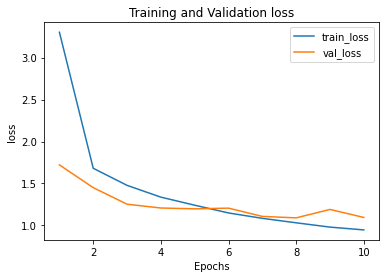

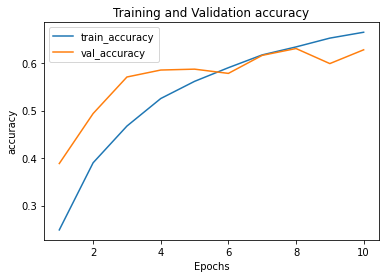

In [ ]:
def plot_metric(history, metric):
      train_metrics = history.history[metric]
      val_metrics = history.history['val_'+metric]
      epochs = range(1, len(train_metrics) + 1)
      plt.plot(epochs, train_metrics)
      plt.plot(epochs, val_metrics)
      plt.title('Training and Validation '+ metric)
      plt.xlabel("Epochs")
      plt.ylabel(metric)
      plt.legend(["train_"+metric, 'val_'+metric])
      plt.show()

plot_metric(history, 'loss')
plot_metric(history, 'accuracy')

In [ ]:
# saving the trained model
model_name = 'CIFAR-10_CNN.h5'
model.save(model_name)

**TEST THE MODEL .PY 2ND STAGE**

In [ ]:
# loading a trained model & use it over test data
loaded_model = keras.models.load_model(model_name)
print("Model was loaded successfully")

Model was loaded successfully


In [ ]:
# calculate some common performance scores
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.107959270477295
Test accuracy: 0.6200000047683716


In [ ]:
y_test_predictions_vectorized = loaded_model.predict(x_test)
y_test_predictions = np.argmax(y_test_predictions_vectorized, axis=1)
print("Model prediction was finished successfully")

313/313 [==============================] - 10s 30ms/step
Model prediction was finished successfully


In [ ]:
y_test_argmax = np.argmax(y_test, axis=1)

In [ ]:
print("Classification Report: \n", classification_report(y_test_argmax, y_test_predictions))

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.69      0.66      1000
           1       0.71      0.83      0.76      1000
           2       0.55      0.45      0.49      1000
           3       0.41      0.38      0.39      1000
           4       0.51      0.57      0.54      1000
           5       0.61      0.42      0.50      1000
           6       0.53      0.88      0.66      1000
           7       0.80      0.62      0.70      1000
           8       0.75      0.72      0.73      1000
           9       0.78      0.65      0.71      1000

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.62     10000
weighted avg       0.63      0.62      0.62     10000



In [ ]:
print("Confusion Matrix: \n", confusion_matrix(y_test_argmax, y_test_predictions))                   

Confusion Matrix: 
 [[691  26  73  16  25   2  26   8 107  26]
 [ 31 826   2  18   2   0  12   1  31  77]
 [ 74  11 446  68 131  51 173  20  19   7]
 [ 27  18  69 379 108 124 211  24  20  20]
 [ 31   5  54  49 571  21 187  66  11   5]
 [ 15  11  71 245 101 418  89  30  12   8]
 [  6   8  29  37  25   7 880   2   6   0]
 [ 24   9  42  71 119  53  36 624   6  16]
 [128  59  13  18  14   2  19   2 718  27]
 [ 56 196  10  25  13   3  15   5  30 647]]


In [ ]:
print("Predictions: Νumber of elements for each class")
unique_test_pred, counts_test_pred = np.unique(y_test_predictions, return_counts=True)
print(dict(zip(unique_test_pred, counts_test_pred)), "\n")

Predictions: Νumber of elements for each class
{0: 1083, 1: 1169, 2: 809, 3: 926, 4: 1109, 5: 681, 6: 1648, 7: 782, 8: 960, 9: 833} 



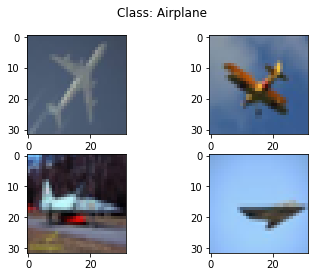

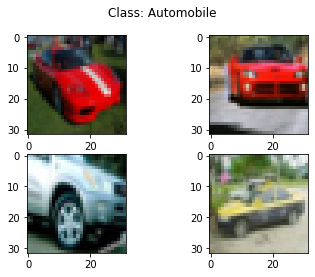

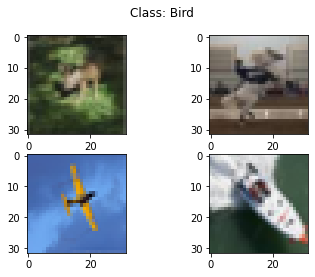

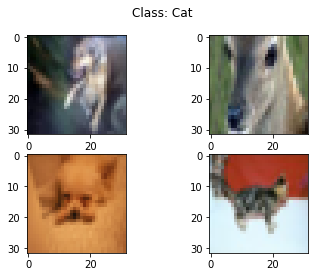

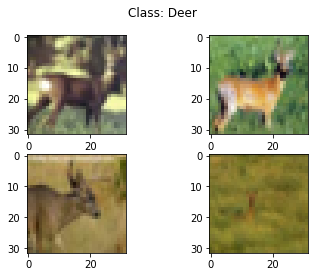

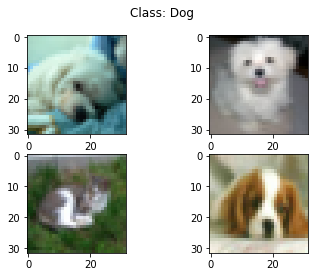

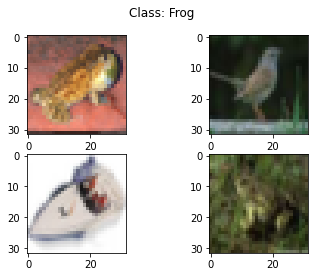

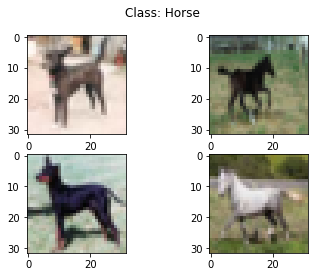

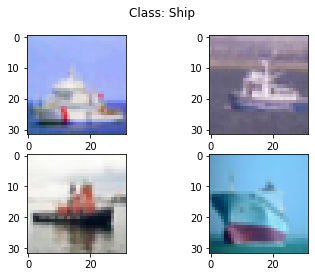

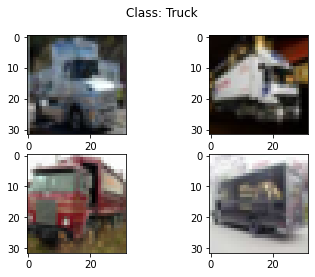

In [ ]:
#plot randomly 4 images for each prediction class

class_to_demonstrate = 0
while (sum(y_test_predictions == class_to_demonstrate) > 4):
    tmp_idxs_to_use = np.where(y_test_predictions == class_to_demonstrate)

    # create new plot window
    plt.figure()

    # plot 4 random images
    plt.subplot(221)
    plt.imshow(x_test[tmp_idxs_to_use[0][randrange(counts_test_pred[class_to_demonstrate])], :, :, :])
    plt.subplot(222)
    plt.imshow(x_test[tmp_idxs_to_use[0][randrange(counts_test_pred[class_to_demonstrate])], :, :, :])
    plt.subplot(223)
    plt.imshow(x_test[tmp_idxs_to_use[0][randrange(counts_test_pred[class_to_demonstrate])], :, :, :])
    plt.subplot(224)
    plt.imshow(x_test[tmp_idxs_to_use[0][randrange(counts_test_pred[class_to_demonstrate])], :, :, :])
    tmp_title = 'Class: ' + str(classes[class_to_demonstrate])
    plt.suptitle(tmp_title)

    # show the plot
    plt.show()
    plt.pause(2)

    # update the class to demonstrate index
    class_to_demonstrate = class_to_demonstrate + 1
